In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [28]:
batch_size = 10
img_height = 200
img_width = 200
data_dir = './extracttrain'

#selected_class_names = ['COCKATOO', 'SCARLET MACAW', 'BLACK HEADED CAIQUE', 'RING-NECKED PHEASANT' 'GOLDEN PARAKEET']



train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    shuffle=True,

)




Found 806 files belonging to 5 classes.
Using 645 files for training.


In [29]:
# data_dir = './extractvalid'
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    shuffle=True,
)


Found 806 files belonging to 5 classes.
Using 161 files for validation.


In [30]:
class_names = train_ds.class_names
print(class_names)


['BLACK HEADED CAIQUE', 'COCKATOO', 'GOLDEN PARAKEET', 'RING-NECKED PHEASANT', 'SCARLET MACAW']


In [31]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")


In [32]:
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break


In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [74]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # [0,256] -> [0,1]
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
    layers.Dropout(.1),
  layers.Dense(128, activation='relu', kernel_regularizer='l1_l2'),
  # layers.Dense(100, activation='relu'),
  # layers.Dense(50, activation='relu'),
  # layers.Dense(25, activation='relu'),
  # layers.Dense(12, activation='relu'),
  #   layers.Dense(6, activation='relu'),
  layers.Dense(num_classes)
])


In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [76]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 100, 100, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 50, 50, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 50, 50, 64)       

In [77]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#callbacks=[callback]

In [78]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
65/65 [==============================] - 16s 229ms/step - loss: 43.0142 - accuracy: 0.3736 - val_loss: 9.4418 - val_accuracy: 0.6087
Epoch 2/20
65/65 [==============================] - 14s 217ms/step - loss: 9.0408 - accuracy: 0.5302 - val_loss: 8.7103 - val_accuracy: 0.6087
Epoch 3/20
65/65 [==============================] - 14s 217ms/step - loss: 8.5170 - accuracy: 0.7194 - val_loss: 8.4693 - val_accuracy: 0.8634
Epoch 4/20
65/65 [==============================] - 14s 218ms/step - loss: 8.5001 - accuracy: 0.7783 - val_loss: 8.7857 - val_accuracy: 0.7826
Epoch 5/20
65/65 [==============================] - 14s 217ms/step - loss: 8.2111 - accuracy: 0.8295 - val_loss: 7.8901 - val_accuracy: 0.8882
Epoch 6/20
65/65 [==============================] - 14s 218ms/step - loss: 7.5820 - accuracy: 0.8636 - val_loss: 7.4280 - val_accuracy: 0.8571
Epoch 7/20
65/65 [==============================] - 14s 217ms/step - loss: 7.5945 - accuracy: 0.8481 - val_loss: 8.0226 - val_accuracy: 0.826

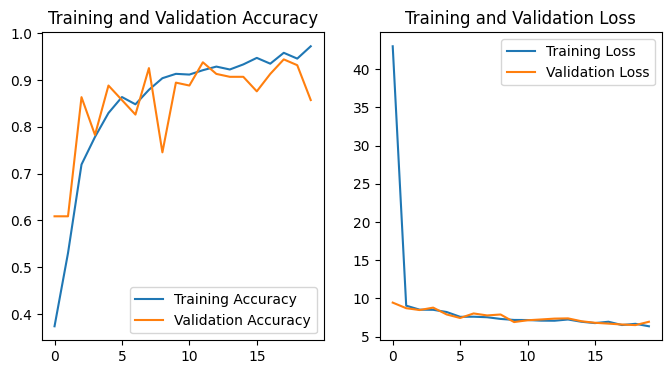

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()





1/1 [==============================] - 0s 31ms/step
This image most likely belongs to RING-NECKED PHEASANT with a 74.98 percent confidence.


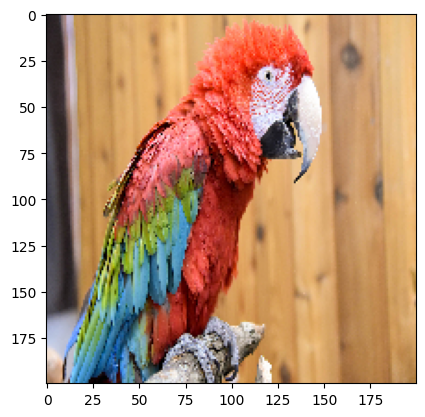

In [86]:
path='predict_data/macaw.jpg'
# path = tf.keras.utils.get_file('conure', origin=url)
target_size=(img_height, img_width)
img = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=target_size,
    interpolation='nearest',
    keep_aspect_ratio=False
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)







In [41]:
#3min fitting time

model.save('Keras_AllBird_model.keras')
# model = keras.models.load_model('100x100_Keras_Allbird_model.keras')
